## Bayesian Analaysis - Drug Testing

In [1]:
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pymc as pm
import arviz as az

from scipy import stats
from scipy.stats import gaussian_kde
from scipy.stats import binom, gamma, beta, poisson

### 1. Model without obervation

In [2]:
n = 100

with pm.Model() as model1:
    theta = pm.Uniform(name = "theta", lower = 0.05, upper = 0.15)
    x = pm.Binomial(name = "x", p = theta, n = 100)
    trace1 = pm.sample(draws = 1000, tune = 1000, chains = 4)

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
ERROR:pymc.stats.convergence:The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [3]:
with model1:
    display(az.summary(trace1))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
x,10.786,4.508,2.000,19.00,0.922,0.660,24.0,42.0,1.15
theta,0.104,0.029,0.058,0.15,0.004,0.003,60.0,556.0,1.06


/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


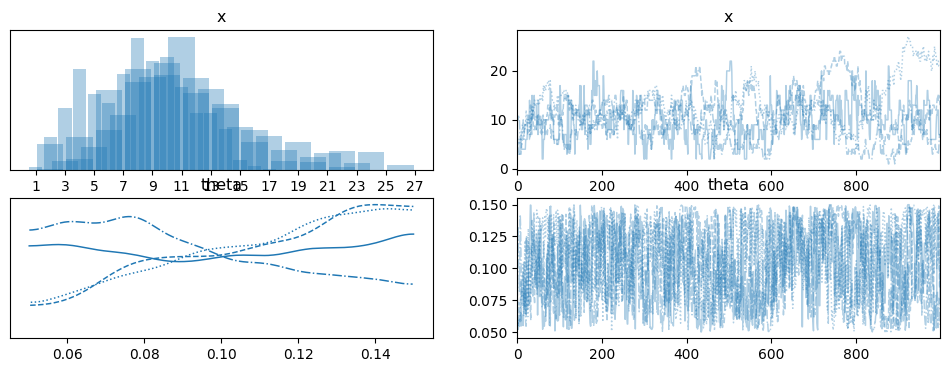

In [4]:
with model1:
    az.plot_trace(trace1)

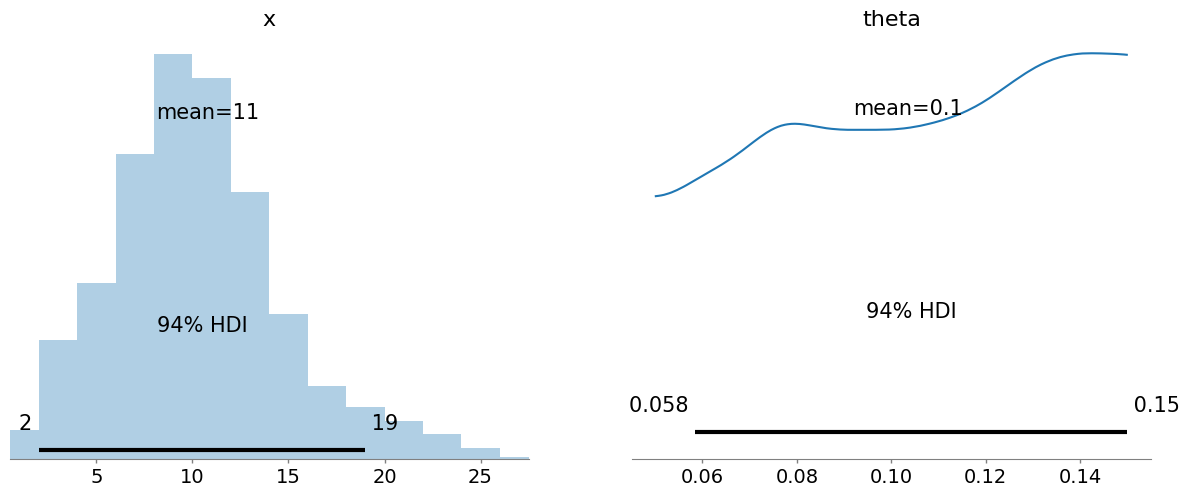

In [5]:
with model1:
    az.plot_posterior(trace1)

### 2. Model Including Observation

In [6]:
n = 100
observed = 20

with pm.Model() as model2:
    theta = pm.Uniform(name = "theta", lower = 0.05, upper = 0.15)
    x = pm.Binomial(name = "x", p = theta, n = 100, observed = observed)
    trace2 = pm.sample(draws = 1000, tune = 1000, chains = 4)

In [7]:
with model2:
    display(az.summary(trace2))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.136,0.012,0.114,0.15,0.0,0.0,1199.0,1382.0,1.0


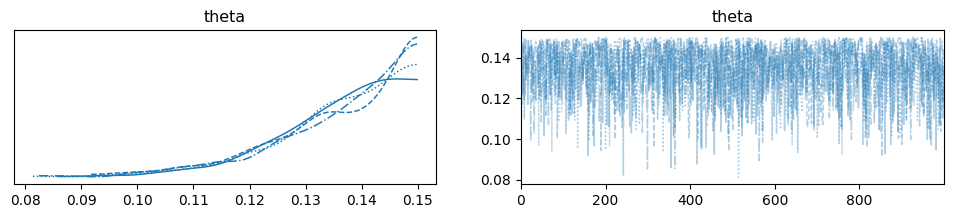

In [8]:
with model2:
    az.plot_trace(trace2)

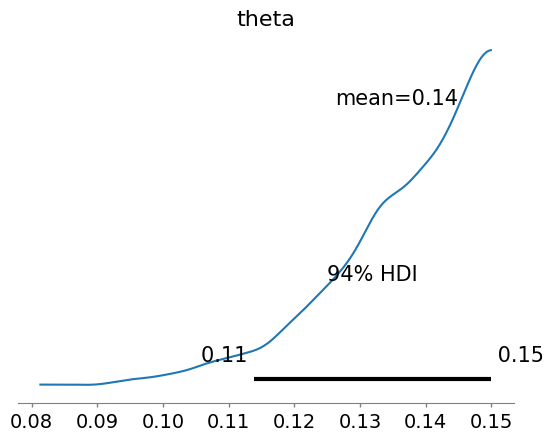

In [9]:
with model2:
    az.plot_posterior(trace2)

### 3. Model Increasing the Interval

In [10]:
n = 100
observed = 20

with pm.Model() as model3:
    theta = pm.Uniform(name = "theta", lower = 0.05, upper = 0.55)
    x = pm.Binomial(name = "x", p = theta, n = 100, observed = observed)
    trace3 = pm.sample(draws = 1000, tune = 1000, chains = 4)

In [11]:
with model3:
    display(az.summary(trace3))

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta,0.206,0.04,0.129,0.277,0.001,0.001,1656.0,2645.0,1.0


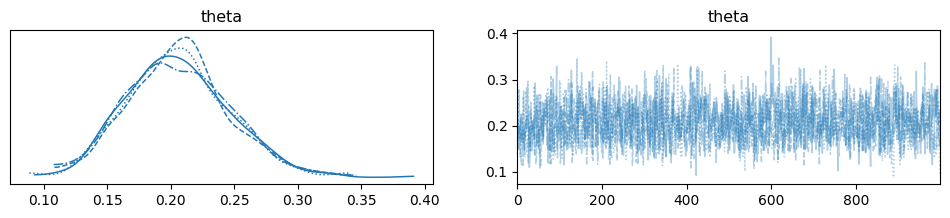

In [12]:
with model3:
    az.plot_trace(trace3)

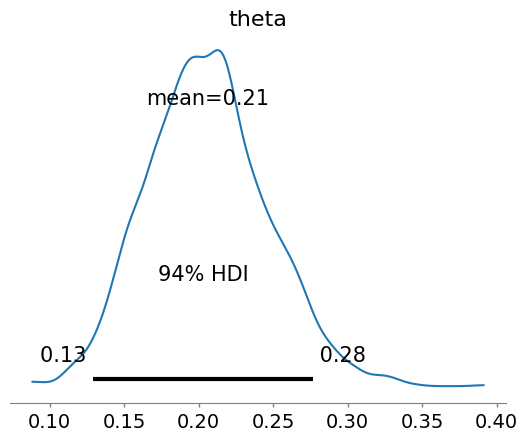

In [13]:
with model3:
    az.plot_posterior(trace3)